# Vision Dataset: Fashion MNIST- A dataset of 70,000 28x28 labelled fashion images
<p align="center">
  <img src="https://storage.googleapis.com/kaggle-datasets-images/2243/3791/9384af51de8baa77f6320901f53bd26b/dataset-cover.png" />
  Image source: https://www.kaggle.com/
</p>

#### Install Tensorflow-GPU if not installed

In [ ]:
!pip install tensorflow-gpu

     |████████████████████████████████| 320.4MB 34kB/s 


## Step 1 : Import the Libraries
Dataset is already available as part of Keras Library

In [4]:
import tensorflow as tf
import numpy as np
import seaborn as sns
import pandas as pd

# Import dataset
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras import layers
from keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from keras.optimizers import SGD
from keras.optimizers import Adam

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
# plt.rcParams['font.sans-serif'] = 'Arial'
# plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = '#191c1b'
plt.rcParams['axes.labelcolor']= '#ffaa80'
plt.rcParams['xtick.color'] = '#e27caa'
plt.rcParams['ytick.color'] = '#799fec'
plt.rcParams['font.size']=12


In [ ]:
tf.__version__

'2.3.1'

## Step 2 : Data visualization

Load the Dataset from Keras dataset

In [5]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
# Mapping Classes
clothing = {0 : 'T-shirt/top',
            1 : 'Trouser',
            2 : 'Pullover',
            3 : 'Dress',
            4 : 'Coat',
            5 : 'Sandal',
            6 : 'Shirt',
            7 : 'Sneaker',
            8 : 'Bag',
            9 : 'Ankle boot'}

Check the Shape of Training and Testing data

In [ ]:
data_count = [X_train.shape[0], X_test.shape[0]]
print(f'Number of records for Training : {data_count[0]}')
print(f'Number of records for Testing : {data_count[1]}')
print(f'Shape : {X_train.shape}')

Number of records for Training : 60000
Number of records for Testing : 10000
Shape : (60000, 28, 28)


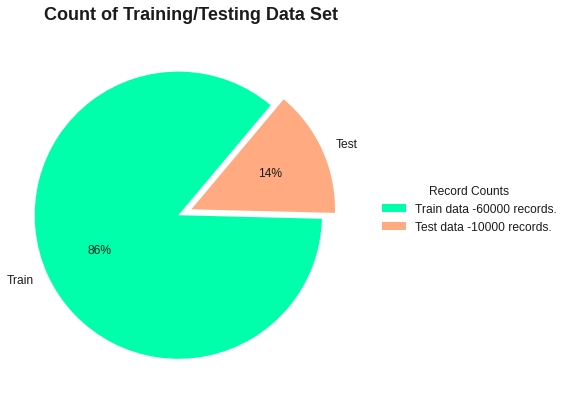

In [ ]:
fig, ax = plt.subplots(figsize=(8,12))
wedges, texts, autotexts = ax.pie(x=[data_count[0], data_count[1]]
                                  , labels=['Train', 'Test']
                                  , explode=(0.1,0)
                                  , autopct='%1.0f%%' # Autopct formats our values as strings with a set number of decimal points.
                                  , colors=['#00ffaa', '#ffaa80']
                                  , startangle=50 )

_ = ax.set_title("Count of Training/Testing Data Set")
_ = ax.legend(frameon=False)

# for i, a in enumerate(text):
#   a.set_text(f"{data_count[i]}")
ax.legend(wedges, [f'Train data -{data_count[0]} records.', f'Test data -{data_count[1]} records.'],
          title="Record Counts",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
# plt.setp(autotexts, size=8, weight="bold")

plt.show()

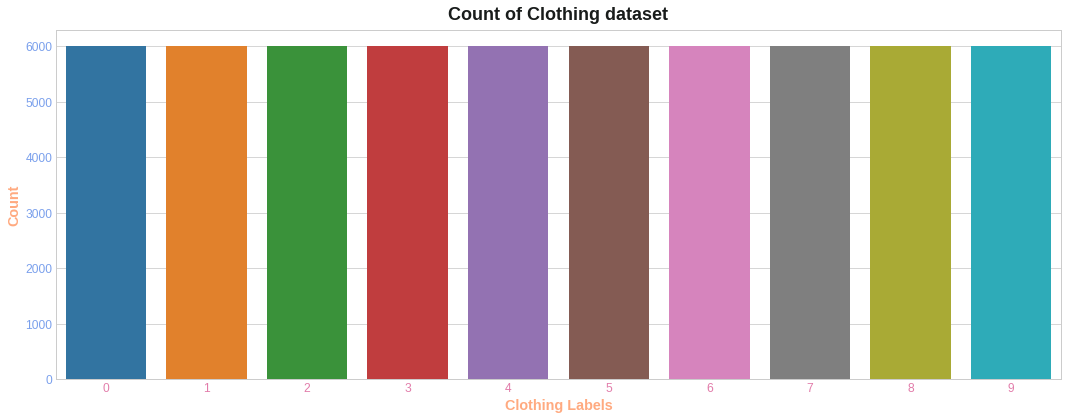

In [ ]:
fig, ax = plt.subplots(figsize=(15,6))
sns.countplot(x=y_train)
ax.set(title='Count of Clothing dataset', xlabel='Clothing Labels', ylabel='Count')
plt.show()

Check the Random image from dataset

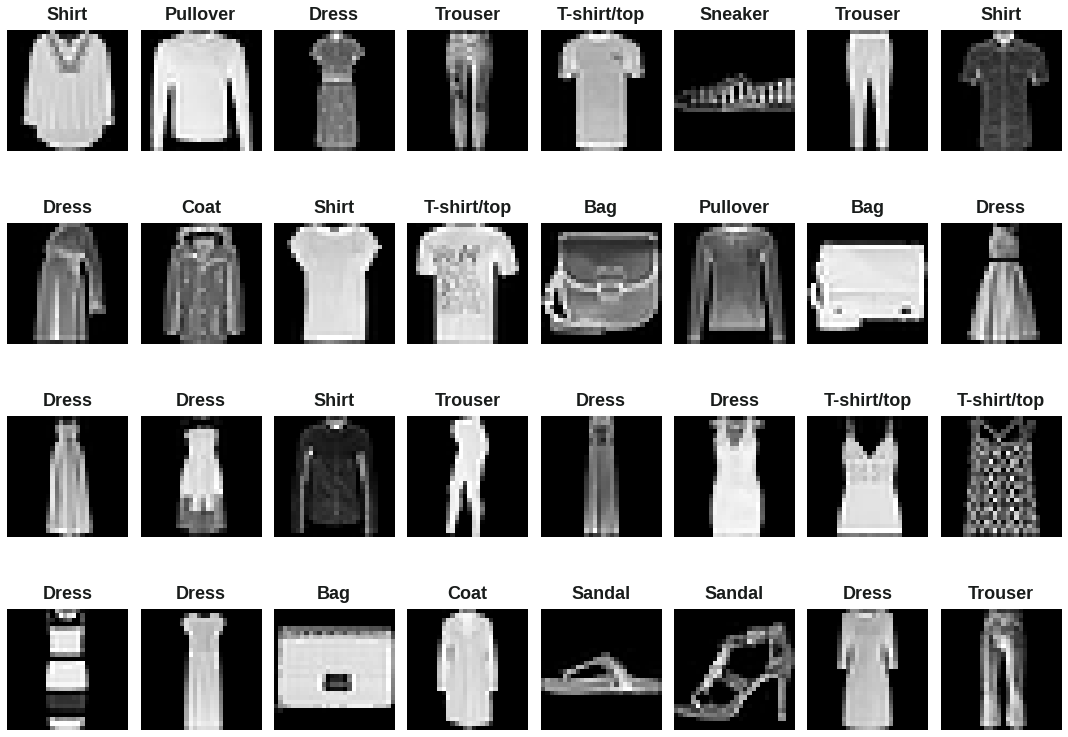

In [ ]:
fig, axes = plt.subplots(4, 8, figsize = (15,12))
for row in axes:
    for axe in row:
        index = np.random.randint(60000)
        indx = y_train[index]
        cloth = clothing[indx]
        axe.imshow(X_train[index], cmap='gray')
        axe.set_title(cloth)
        axe.set_axis_off()

## Step 2 : Preprocessing

Normalize the dataset to bring it in the range of (0,1) - divide each pixel by 255.


In this way each pixel will be in the range [0, 1]. By normalizing images we make sure that our model (ANN) trains faster.

In [6]:
X_train = X_train/255.0
X_test = X_test/255.0

### Reshaping the dataset

Since we are building a fully connected network, we reshape the training set and the test set to be into the vector format.

In [7]:
# Since each image's dimension is 28x28, we reshape the full dataset to [-1 (all elements), height * width]
X_train = X_train.reshape(-1, 28*28)
X_train.shape

(60000, 784)

In [8]:
# We reshape the test set the same way
X_test = X_test.reshape(-1, 28*28)

## Step 4: Building an Artificial Neural Network
Define a Model of atleast 4 Layers

Layer hyper-parameters:
- number of units/neurons: 128
- activation function: ReLU
- input_shape: (784, )
- Regularization : L2

### Adding layer with Dropout at last

Dropout is a Regularization technique where we randomly set neurons in a layer to zero. That way while training those neurons won't be updated. Because some percentage of neurons won't be updated the whole training process is long and we have less chance for overfitting.

<u>**It has been observed the best performance is achieved by adding it at the last layer. The experiments done to infer this is shown at the end of the notebook.**</u>

### No. of Units
No. of units kept to 128 to compensate the dropout layer and for better learning

In [ ]:
tf.keras.backend.clear_session()

In [9]:
def model_build(num_layers=4, l2_regularizer=True, dropout_position=3):
  """ 
  Method to build a Model for given inputs 
  return : Returns the Sequential model built for given inputs
  """
  regularizer=None
  num_units = 128
  input_shape  = [28*28]

  if l2_regularizer:
    regularizer = tf.keras.regularizers.L2(0.01)

  # Build a sequential Model
  model = Sequential()
  print(f'Number of Layers : {num_layers+2}')
  for i in range(num_layers):
    # model.add(layers.BatchNormalization())
    # Add input shape to the first layer
    if i==0 :
      model.add(layers.Dense(num_units, input_shape=input_shape, activation='relu',
                          kernel_regularizer=regularizer, 
                          activity_regularizer=regularizer
                          ))  
    else :
      model.add(layers.Dense(num_units, activation='relu',
                            kernel_regularizer=regularizer, 
                            activity_regularizer=regularizer))
    
    # Add dropout after the Dense layer at given position
    if i==dropout_position :
      model.add(layers.Dropout(0.2))


  # Adding the output layer
  #   units: number of classes (10 in the Fashion MNIST dataset)
  #   activation: softmax
  model.add(layers.Dense(10, activation='softmax'))
  model.summary()
  return model

In [10]:
# Build a model for given number of layers
l2_model = model_build() # Use defaults as they have the best settings
l2_model.layers

Number of Layers : 6
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 151,306
Trainable params: 151,306
Non-trainable params: 0
_____________________________

## Step 5: Model Compilation
- Optimizer: **Adam** : <br>Adam is an SGD algorithm that has an adaptive learning rate that makes it suitable for most problems without any parameter tuning (it is "self tuning", in a sense). Adam is a great general-purpose optimizer.
- Loss: **Sparse softmax (categorical) crossentropy** : <br>Cross-entropy is the default loss function to use for multi-class classification problems
- Learning rate : kept as Default(0.001) as it gave better results in Training and testing<br>If your learning rate is set too low, training will progress very slowly as you are making very tiny updates to the weights in your network. However, if your learning rate is set too high, it can cause undesirable divergent behavior in your loss function

In [11]:
opt = Adam()
l2_model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

## Step 6: Model Training


Rather than iterating with different Epochs we can add an early-stopping to prevent the overfitting of Model. 

A callback is just a function you want run every so ofter while the network trains. The early stopping callback will run after every epoch.

After defining the callback, add it as an argument in fit (you can have several, so put it in a list). Choose a large number of epochs when using early stopping, more than you'll need.

In [12]:
early_stopping = EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=10, # how many epochs to wait before stopping
    restore_best_weights=True,
)


In [14]:
def loss_acc_plot(df, batch_size=None):
  """
  Method to plot the Loss and Accurracy with the given History dataframe as input
  """
  # evaluate the model
  train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
  test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
  print("----------------------------------------------------------")
  print("\t          | Train | Test")  
  print("----------------------------------------------------------")
  print(f"\tLoss      | {train_loss:.3f} | {test_loss:.3f}")  
  print(f"\tAccurracy | {train_loss:.3f} | {test_loss:.3f}")  
  print("----------------------------------------------------------")
  # plot loss during training
  fig, ax = plt.subplots(ncols=2, figsize=(12,6))
  fig.suptitle(f'Loss and Accurracy Graph\nBatch size {batch_size}', size=15)
  # plt.subplot(211)
  ax[0].set_title('Loss')
  ax[0].plot(df['loss'], label='train')
  ax[0].plot(df['val_loss'], label='test')
  ax[0].legend()
  # plot mse during training
  ax[1].set_title('Accurracy')
  ax[1].plot(df['accuracy'], label='train')
  ax[1].plot(df['val_accuracy'], label='test')
  ax[1].legend()
  plt.show()

def loss_acc_plot(df, train_loss, train_accuracy, test_loss
                  , test_accuracy, batch_size=None):
  """
  Method to plot the Loss and Accurracy with the given History dataframe as input
  """
  print("----------------------------------------------------------")
  print("\t          | Train | Test")  
  print("----------------------------------------------------------")
  print(f"\tLoss      | {train_loss:.3f} | {test_loss:.3f}")  
  print(f"\tAccurracy | {train_accuracy:.3f} | {test_accuracy:.3f}")  
  print("----------------------------------------------------------")
  # plot loss during training
  fig, ax = plt.subplots(ncols=2, figsize=(12,6))
  fig.suptitle(f'Loss and Accurracy Graph\nBatch size {batch_size}', size=15)
  # plt.subplot(211)
  ax[0].set_title('Loss')
  ax[0].plot(df['loss'], label='train')
  ax[0].plot(df['val_loss'], label='test')
  ax[0].legend()
  # plot mse during training
  ax[1].set_title('Accurracy')
  ax[1].plot(df['accuracy'], label='train')
  ax[1].plot(df['val_accuracy'], label='test')
  ax[1].legend()
  plt.show()

# Method to train a model
from time import perf_counter
def train_model(model, batch_size):
  """
  This method will train the model for given batch_size
  """
  t_start = perf_counter()
  history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test), 
    batch_size=batch_size, epochs=300,
    callbacks=[early_stopping],
    verbose=0
    )
  train_time  = perf_counter() - t_start
  print("\n")
  print(f"Time taken for training : {train_time:0.2f} seconds. Batch size : {batch_size}")
  # Evaulate the model
  train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
  test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
  # Store results in data frame
  history_df = pd.DataFrame(history.history)
  history_df.head()
  # Plot the loss and accuraccy graph
  loss_acc_plot(history_df, train_loss, train_accuracy
                , test_loss, test_accuracy, batch_size)
  return [train_time, train_loss, train_accuracy, test_loss, test_accuracy]

def train_for_batches(model, start_batch_size=32):
  """ 
  This Method will train the model for different batch sizes and will 
  print their Loss and Accurracy graph
  return : Dataframe with metrics for each batch_size 
  """
  # List of batch size(in steps of 32) for testing of loss and accurracy
  batch_sizes = [x for x in range(start_batch_size,150,32)]
  eval_df_cols = ['train_time','loss','accurracy', 'val_loss', 'val_accurracy']
  eval_df = pd.DataFrame(index=batch_sizes, columns=eval_df_cols)
  # Train model with various batch size and view the performance
  for batch_size in batch_sizes:
    result = train_model(model=model, batch_size=batch_size)
    eval_df.loc[batch_size] = result
  
  return eval_df

### Train the Model for **various batch Sizes** and compare their loss and accurracy



Time taken for training : 277.32 seconds. Batch size : 32
----------------------------------------------------------
	          | Train | Test
----------------------------------------------------------
	Loss      | 0.575 | 0.617
	Accurracy | 0.858 | 0.842
----------------------------------------------------------


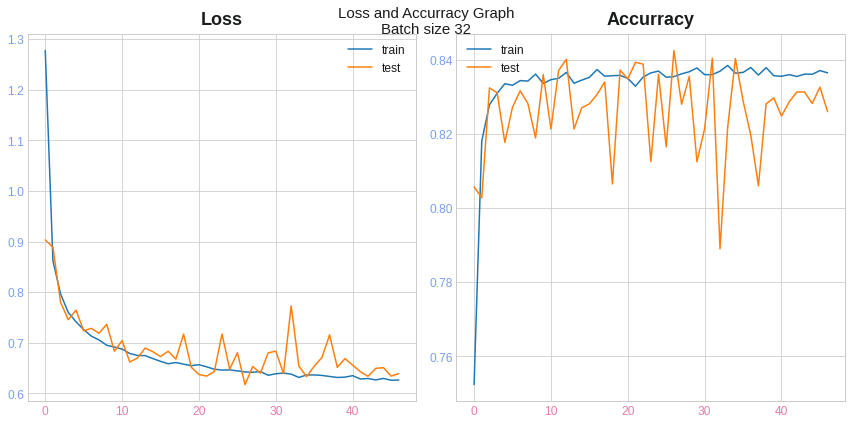



Time taken for training : 125.85 seconds. Batch size : 64
----------------------------------------------------------
	          | Train | Test
----------------------------------------------------------
	Loss      | 0.546 | 0.594
	Accurracy | 0.864 | 0.848
----------------------------------------------------------


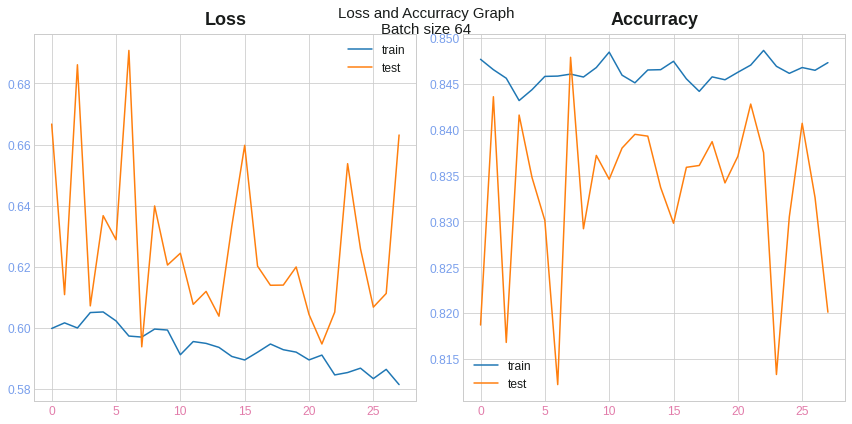



Time taken for training : 135.81 seconds. Batch size : 96
----------------------------------------------------------
	          | Train | Test
----------------------------------------------------------
	Loss      | 0.523 | 0.573
	Accurracy | 0.867 | 0.849
----------------------------------------------------------


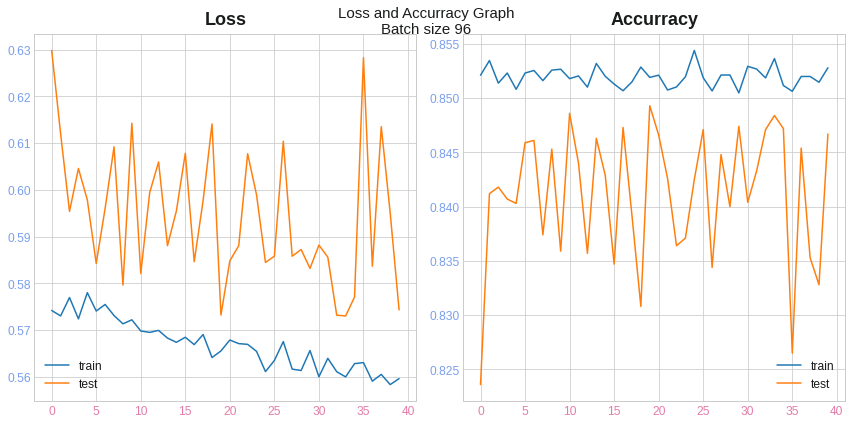



Time taken for training : 192.19 seconds. Batch size : 128
----------------------------------------------------------
	          | Train | Test
----------------------------------------------------------
	Loss      | 0.497 | 0.547
	Accurracy | 0.871 | 0.854
----------------------------------------------------------


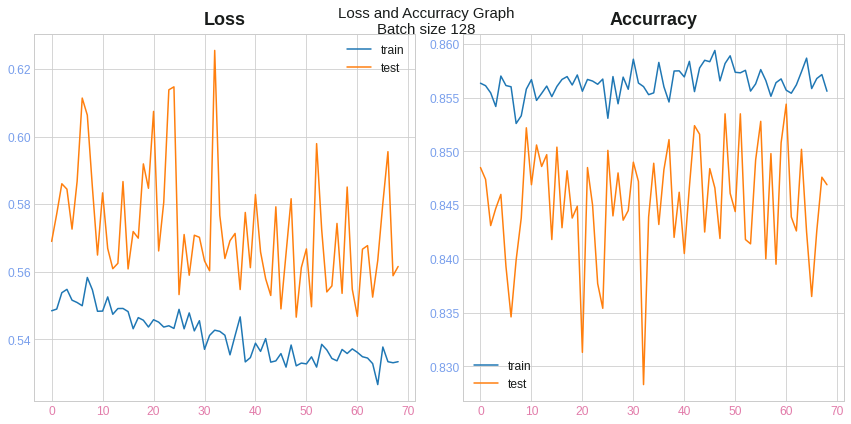

In [ ]:
eval_df = train_for_batches(l2_model, 32)

### Training time reduces with Larget batch size, also slight improvement in Loss and accurracy with Regularization as L2

In [ ]:
eval_df

,train_time,loss,accurracy,val_loss,val_accurracy
32,277.318,0.575365,0.8582,0.617351,0.8425
64,125.852,0.546252,0.863683,0.593771,0.8479
96,135.813,0.522827,0.867283,0.573205,0.8493
128,192.186,0.496944,0.871017,0.546557,0.8535


## Step 7: Model Evaluation

Number of Layers : 6
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 151,306
Trainable params: 151,306
Non-trainable params: 0
_____________________________

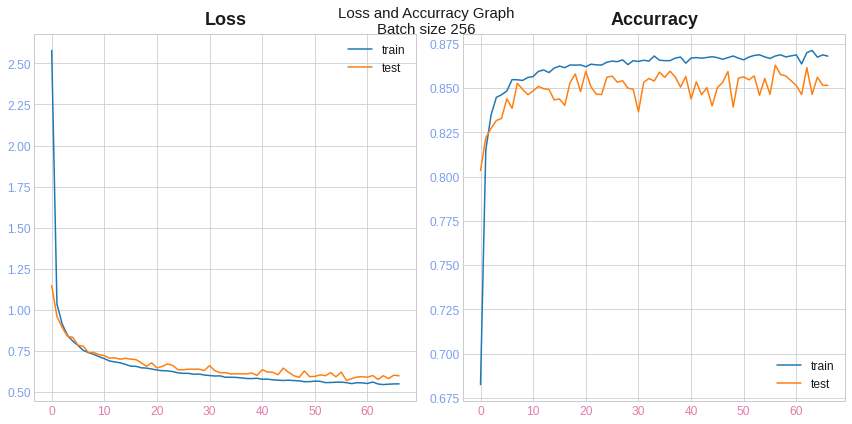

In [ ]:
# Let's rebuild the Model with best parameters
model = model_build()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
result = train_model(model,256)

#### Classification Report

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(Y_pred,axis = 1) 

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test/Validation accuracy: {test_accuracy:.3f}")
print (classification_report(y_test, y_pred_classes))

313/313 [==============================] - 0s 1ms/step - loss: 0.5692 - accuracy: 0.8629
Test/Validation accuracy: 0.863
              precision    recall  f1-score   support

           0       0.80      0.83      0.81      1000
           1       0.99      0.95      0.97      1000
           2       0.78      0.77      0.77      1000
           3       0.85      0.89      0.87      1000
           4       0.75      0.82      0.78      1000
           5       0.96      0.94      0.95      1000
           6       0.69      0.58      0.63      1000
           7       0.92      0.93      0.93      1000
           8       0.95      0.96      0.96      1000
           9       0.94      0.94      0.94      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



#### Confusion Matrix

In [ ]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          title='Confusion matrix'):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """    
    data = confusion_matrix(y_true, y_pred)
    df_cm = pd.DataFrame(data, columns=classes, index = classes).astype('float')
    
    df_cm.index.name = 'Actual'
    df_cm.columns.name = 'Predicted'
    plt.figure(figsize = (12,8))
    plt.title(title, color='green', fontsize=25)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, color='indigo')
    plt.yticks(tick_marks, classes, color='indigo')
    sns.set(font_scale=1.4) #for label size
    sns.heatmap(df_cm, cmap="YlGnBu", annot=True, annot_kws={"size": 16}, fmt=".0f")
    # plt.imshow(df_cm, interpolation='nearest', cmap="YlGnBu")
    plt.tight_layout()
    plt.ylabel('Actual', color='crimson', fontsize=20)
    plt.xlabel('Predicted', color='crimson', fontsize=20)

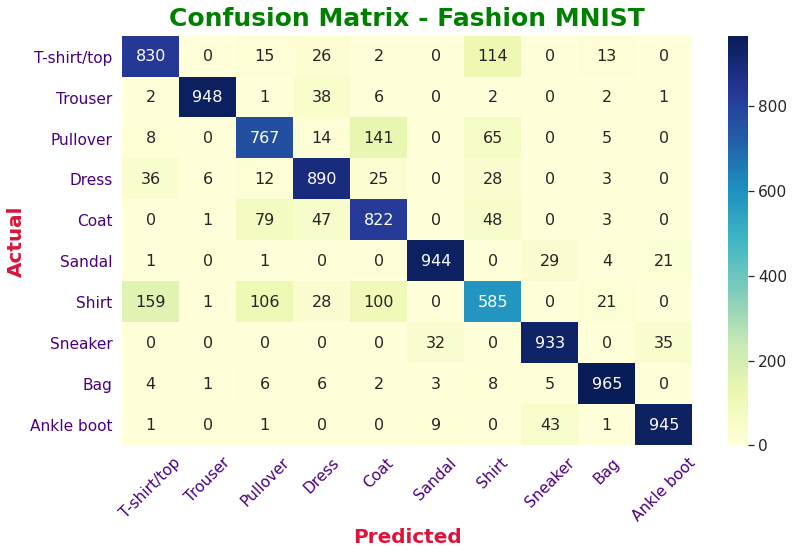

In [ ]:
plot_confusion_matrix(y_test, y_pred_classes, clothing.values(), title="Confusion Matrix - Fashion MNIST")

### Summary
Maximum no. of correct prediction was given for Bags

Maximum no. of wrong predictions were made for Shirt

#### Model Comparision
The best result was given by Model with layers = 6, Optimizer=Adam, learning_rate = 0.001, batch_size=256 and Dropout layer at the last 

The worst result was given by Model with layers = 6, Optimizer=Adam, learning_rate=0.01, batch_size=64 and Dropout layer in the middle


## Model without regularization
Regularization is a technique which makes slight modifications to the learning algorithm by penalizing the weight matrices such that the model generalizes better. This in turn improves the model’s performance on the unseen data as well.


#### We can see smoothness in the Plot without regularization as no penaly is being imposed and avoids overfitting.

#### We can also observe Training accuraccy is higher than the validation/Test accurracy



Number of Layers : 5
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 128)               100480    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_12 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_13 (Dense)             (None, 10)                1290      
Total params: 134,794
Trainable params: 134,794
Non-trainable params: 0
_________________________________________________________________


Time taken for training : 109.14 seconds. Batch size : 128
--------------------------------

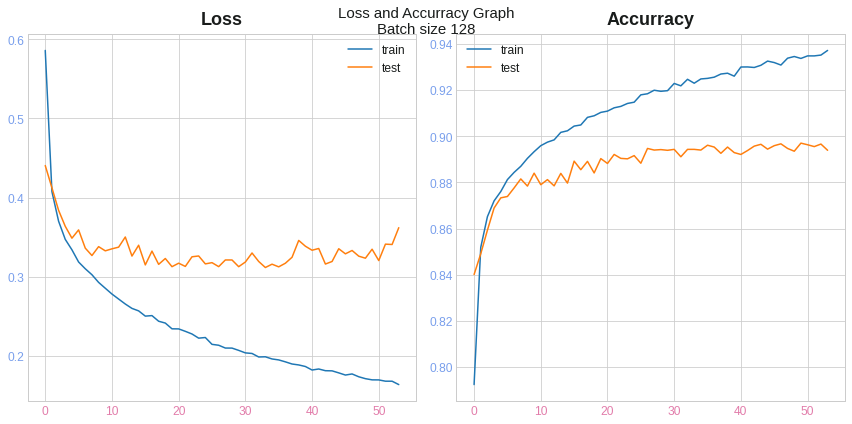

In [ ]:
wo_l2_model = model_build(num_layers=3, l2_regularizer=False, dropout_position=0)
opt = Adam()
wo_l2_model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
result = train_model(wo_l2_model, batch_size=128)

## Changing dropout position


#### We can see the dropout layer placed in the end gave the best performance and one in the middle gave the worst performance



Number of Layers : 6
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 128)               100480    
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_28 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_29 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_30 (Dense)             (None, 10)                1290      
Total params: 151,306
Trainable params: 151,306
Non-trainable params: 0
___________________________

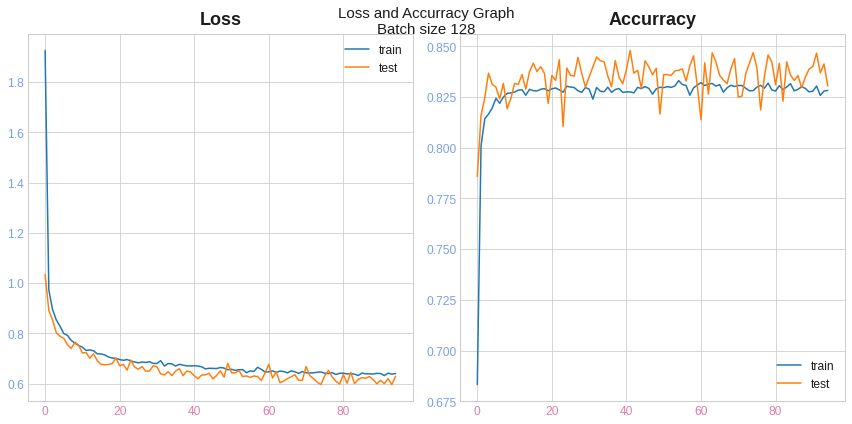

In [ ]:
# Model with Dropout layer after First dense layer
l2_model_40 = model_build(num_layers=4, l2_regularizer=True, dropout_position=0)
l2_model_40.layers
l2_model_40.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
result = train_model(l2_model_40, 128)

Number of Layers : 6
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_32 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_33 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_34 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_35 (Dense)             (None, 10)                1290      
Total params: 151,306
Trainable params: 151,306
Non-trainable params: 0
___________________________

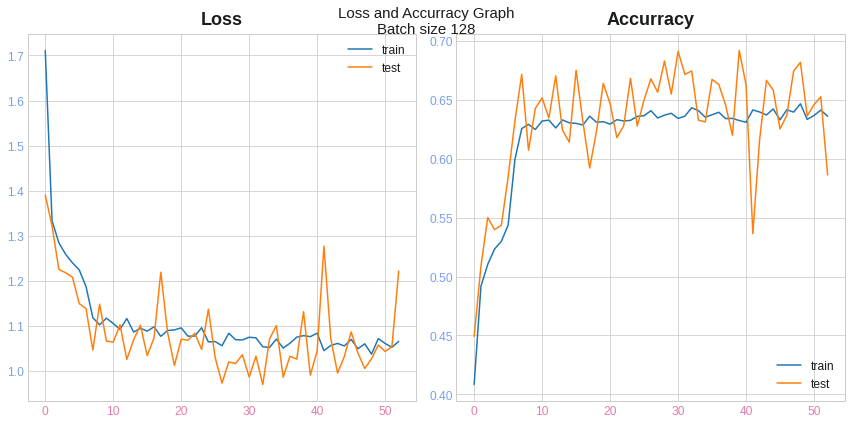

In [ ]:
# Model with Dropout layer after second dense layer
l2_model_41 = model_build(num_layers=4, l2_regularizer=True, dropout_position=1)
l2_model_41.layers
opt = Adam(lr=0.01)
l2_model_41.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
result = train_model(l2_model_41, 128)

Number of Layers : 6
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_37 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_38 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_8 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_39 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_40 (Dense)             (None, 10)                1290      
Total params: 151,306
Trainable params: 151,306
Non-trainable params: 0
___________________________

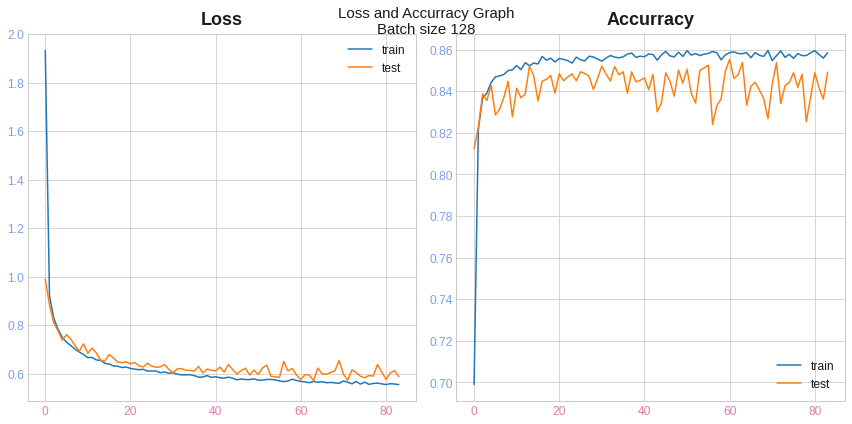

In [ ]:
# Model with Dropout layer after Third dense layer
l2_model_42 = model_build(num_layers=4, l2_regularizer=True, dropout_position=2)
l2_model_42.layers
opt = Adam(lr=0.001)
l2_model_42.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
result = train_model(l2_model_42, 128)

Number of Layers : 6
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_41 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_42 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_43 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_44 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_9 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_45 (Dense)             (None, 10)                1290      
Total params: 151,306
Trainable params: 151,306
Non-trainable params: 0
___________________________

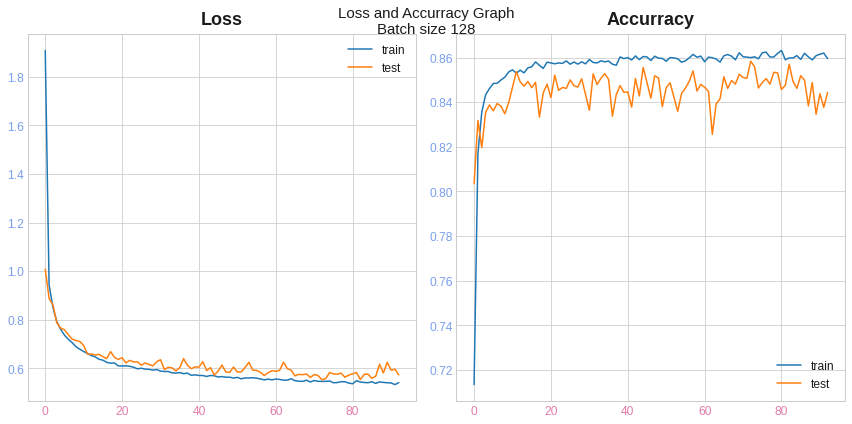

In [ ]:
# Model with Dropout layer after Fourth dense layer
l2_model_42 = model_build(num_layers=4, l2_regularizer=True, dropout_position=3)
l2_model_42.layers
opt = Adam(lr=0.001)
l2_model_42.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
result = train_model(l2_model_42, 128)

### Changing Optimizer
If your learning rate is set too low, training will progress very slowly as you are making very tiny updates to the weights in your network. However, if your learning rate is set too high, it can cause undesirable divergent behavior in your loss function

Let's compare and SGD Optimizer with the Adam for the same set of Hyperparameters. Adam has performed slighly better

Number of Layers : 5
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_10 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_11 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 10)                1290      
Total params: 134,794
Trainable params: 134,794
Non-trainable params: 0
_________________________________________________________________


Time taken for training : 629.46 seconds. Batch size : 128
--------------------------------

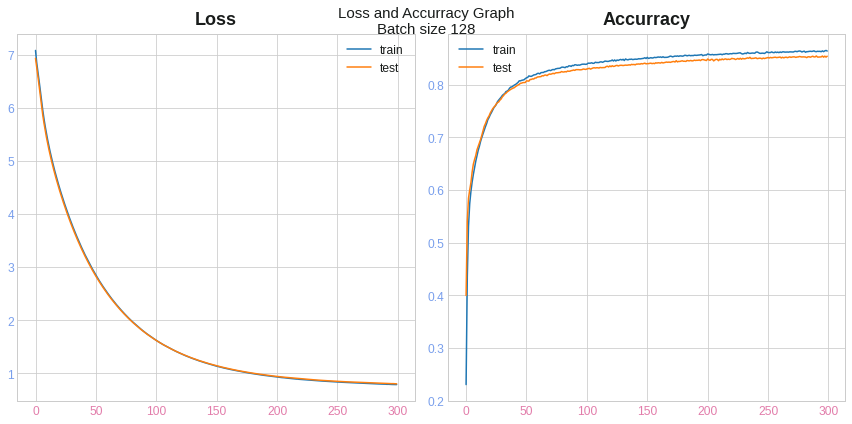

In [16]:
sgd_l2_model_1 = model_build(num_layers=3, l2_regularizer=True, dropout_position=2)
opt = SGD(lr=0.001)
sgd_l2_model_1.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
result = train_model(sgd_l2_model_1, 128)

Number of Layers : 5
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_14 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_15 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 10)                1290      
Total params: 134,794
Trainable params: 134,794
Non-trainable params: 0
_________________________________________________________________


Time taken for training : 83.63 seconds. Batch size : 128
---------------------------------

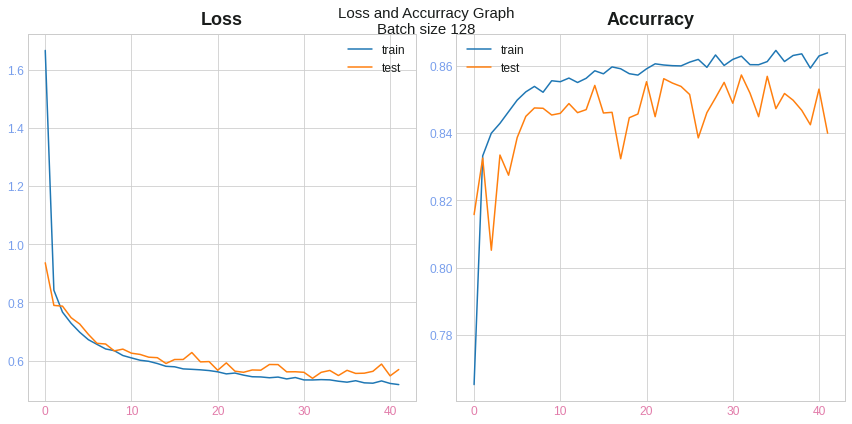

In [17]:
adam_l2_model = model_build(num_layers=3, l2_regularizer=True, dropout_position=2)
adam_l2_model.layers
opt = Adam(lr=0.001)
adam_l2_model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
result = train_model(adam_l2_model, 128)